# Description

Training a Multi-Layer Perceptron for genre classification from the data extracted using preprocessor.

# Packages

In [12]:
import json
import numpy as np
from  sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

# Loading data

In [13]:
DATA_PATH = "preprocessed_raw_audio_data.json"

In [14]:
def load_data(path):

    with open(path, "r") as fp:
        data = json.load(fp)
    
    features = np.array(data["mfcc"])
    target = np.array(data["labels"])

    return features, target


In [15]:
features, target = load_data(DATA_PATH)

In [16]:
# try
print(f"Feature: {features[0]} \n Label: {target[0]}")

Feature: [[-2.42435989e+02  1.02184868e+02 -9.91323471e+00 ... -3.95323277e+00
  -2.40564632e+00 -2.38090801e+00]
 [-2.12989746e+02  1.03544785e+02 -1.08341713e+01 ... -5.81353378e+00
   2.64356709e+00 -2.80662346e+00]
 [-1.95409302e+02  1.04360657e+02 -1.85502887e-01 ... -1.08171625e+01
  -5.88805974e-01 -5.28410244e+00]
 ...
 [-1.24157700e+02  6.37352219e+01  2.11729393e+01 ... -1.65676632e+01
   1.37965145e+01 -2.31835346e+01]
 [-1.11283936e+02  6.05447235e+01  1.33710217e+00 ... -1.22842150e+01
   1.48256063e+01 -1.58052387e+01]
 [-1.31811951e+02  6.65644531e+01 -7.93185902e+00 ... -8.66252232e+00
   1.16732750e+01 -8.72385406e+00]] 
 Label: 0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3)

# Model definiton

In [18]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(features.shape[1], features.shape[2])),
    
    tf.keras.layers.Dense(512, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.Dropout(0.3),
    

    tf.keras.layers.Dense(256, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
  
    

    tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
    tf.keras.layers.Dropout(0.3),
   
    
    tf.keras.layers.Dense(10, activation='linear')
])


In [19]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [20]:
model.compile(optimizer=optimizer, loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics =["accuracy"])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 1690)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       865,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,014,218 (3.87 MB)

 Trainable params: 1,014,218 (3.87 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
def plot_history(history):

    fig, ax = plt.subplots(2)

    # plotting accuracy

    ax[0].plot(history.history["accuracy"], label="train_accuracy")
    ax[0].plot(history.history["val_accuracy"], label="test_accuracy")
    ax[0].set_ylabel("Accuracy")
    ax[0].legend(fontsize = 5, loc="lower right")
    ax[0].set_title("Accuracy")

     # plotting error

    ax[1].plot(history.history["loss"], label="train_error")
    ax[1].plot(history.history["val_loss"], label="test_error")
    ax[1].set_ylabel("Error")
    ax[1].set_xlabel("Epoch")
    ax[1].legend(fontsize = 5, loc= "upper right")
    ax[1].set_title("Error")

    plt.show()

# Training

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1093 - loss: 10.8188 - val_accuracy: 0.1008 - val_loss: 2.4177
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1001 - loss: 2.4265 - val_accuracy: 0.1021 - val_loss: 2.4099
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1065 - loss: 2.4604 - val_accuracy: 0.0981 - val_loss: 2.4184
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0962 - loss: 2.4303 - val_accuracy: 0.1001 - val_loss: 2.4133
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1006 - loss: 2.4191 - val_accuracy: 0.0978 - val_loss: 2.4168
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1026 - loss: 2.4152 - val_accuracy: 0.0981 - val_loss: 2.4135
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1029 - loss: 2.4137 - val_accuracy: 0.0981 - val_loss: 2.4109
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1033 - loss: 2.4102 - val_acc

# Evaluation

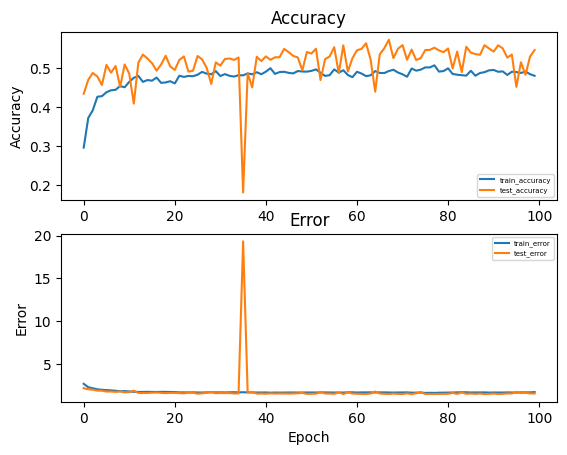

In [ ]:
plot_history(history) 

In [ ]:
logits = model.predict(X_test)
probabilities = tf.nn.softmax(logits)
predicted_genres = tf.argmax(probabilities, axis=-1).numpy()

accuracy = np.mean(y_test==predicted_genres)*100

print(f"Accuracy: {accuracy:.4f}")


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 54.6061
